<img src="https://u2k3a4x7.stackpathcdn.com/wp-content/uploads/2018/10/lgbtq-scaled.jpg" style = "float:center; width:1000px; height:400px;">

# Influences on LGBT High Suicide Attempts Ratio
**Lei Xue**

Presentation Video is from https://pitt.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=5ce192a7-3c77-4e3e-8cc5-ae830183f1d5

<img src="https://cdn.dribbble.com/users/725870/screenshots/11944030/media/e04f53591ff5fd52a13e21565245f8f1.jpg?compress=1&resize=400x300" style = "float:right; width:450px; height:390px;">

### 🐱<font color='hotpink'>Here is the outline of Python Notebook🐱

- 1.High suicide attempts ratio on LGBT than Heterosexual
>- 1.1 Dataset with LGBT and Dataset with Heterosexual Selection
>
>- 1.2 Suicide Attempts Ratio Comparision
- 2.variables that show higher ratio in LGBT compared with heterosexual.
- 3.Classification  
>- 3.1 KNN-Classification
>
>- 3.2 Desicion Tree  
- 4.Regression  
>- 4.1 Heat Map
>
>- 4.2 Mutiple Regression

- 5.Summary 

## 1. High suicide attempted on LGBT than Heterosexual

### 1.1 Select dataset with LGBT and dataset with Heterosexual

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.patches import Polygon
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('yrbsdata.csv')
df.head()

,sitecode,sitename,sitetype,sitetypenum,year,survyear,weight,stratum,PSU,record,...,qwenthungry,qmusclestrength,qsunscreenuse,qindoortanning,qsunburn,qconcentrating,qcurrentasthma,qwheresleep,qspeakenglish,qtransgender
0,KY,Kentucky (KY),State,2,2007,9,51.6402,28,2,648526,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,KY,Kentucky (KY),State,2,2007,9,104.2187,18,2,648527,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
2,KY,Kentucky (KY),State,2,2007,9,33.2209,6,2,648528,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
3,KY,Kentucky (KY),State,2,2007,9,29.7973,29,2,648529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KY,Kentucky (KY),State,2,2007,9,29.8429,8,1,648530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(962925, 150)

**`Sexid2` stands by sexual identity:**

>1 = "Heterosexual"
>
>2 = "Sexual Minority" (includes students who
responded that they were gay or lesbian or
bisexual)
>
>3 = "Unsure"

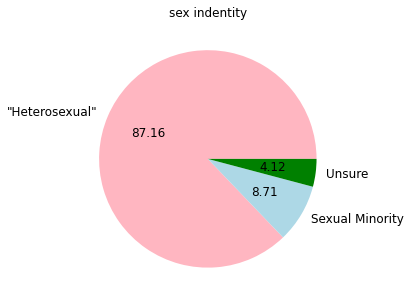

In [4]:
df.sexid2.value_counts().plot.pie(labels=['"Heterosexual"', 'Sexual Minority','Unsure'], colors=['lightpink', 'lightblue','green'],
                 autopct='%.2f', fontsize=12, figsize=(5, 5));
plt.title('sex indentity')
plt.axis('off');

In [5]:
sum(df.sexid2 ==1)

222443

In [6]:
sum(df.sexid2 ==2)

22237

In [7]:
dfstraight = df[df.sexid2 ==1]

In [8]:
dfLGB  = df[df.sexid2 ==2]

**`qtransgende` stands by sexual identity:**

>1 = "not transgender"
>
>2 = "is transgender
>
>3 = "Unsure"
>
>4 = "Dont't know transgender meanings"

In [9]:
df1 = df.loc[df.qtransgender == 2]
df2 = df1.loc[df1.sexid2==2]

In [10]:
df2.sexid2.unique()

array([2.])

In [11]:
dfLGBT  = df[df.sexid2 ==2]

<img src="https://www.clipartmax.com/png/middle/18-188281_gay-pride-logos-logos-gay.png" style = "float:right; width:100px; height:100px;">

**⚠️Explanation⚠️**

> Transgenders all included on the LGB questions because they all chosen Gay/Lesbian/Biosexual on the sex self identity question.**
>
> Thus, I will only use dataset (sexid2 ==2) as LGBT.


### 1.2 Suicide Attempts and Suicide Frequency Ratio Comparision

**⚠️Recode Discription⚠️**
> - I recoded sexid2 variables, 1 for Heterosexual, 0 for LGBT.
>
> - Q25 is question about sad or hopeless, and but used 1 as sad, 2 as not sad. Thus, I recoded it, 1 as sad, 0 as not sad.
>
> - Q28 is suicide attempts, and 1 is no attempted; 2 as 1 time; 3 as 2 or 3 times; 4 as 4 or 5 times; 5 as 6 or more times. Thus, I recoded 1 as having attempts, 0 as no attemptes.( This *ONLY* use in the Suicide-Attemptd Comparision)

#### 1.2.1 Suicide Attempts Ratio Comparison

In [12]:
dfall = df[(df.sexid2 !=3)][['sexid2','q25','q28']]
dfall = dfall.dropna()# I cleaned it because there could be a lot of none values.
dfall['q28'] = np.where(dfall['q28'] > 1, 1, 0)
dfall['q25'] = np.where(dfall['q25'] == 1, 1, 0)
dfall['sexid2'] = np.where(dfall['sexid2'] == 1,'Heterosexual', 'LGBT')
dfall.columns=['Identity','Hopeless or Sad','Suicided Attempted']
dfall.shape

(210335, 3)

In [13]:
Comparision = dfall.groupby(['Identity']).agg({'Hopeless or Sad':['sum'],'Suicided Attempted':['sum','count']})
Comparision.columns = ['Hopeless or Sad','Suicided Attempted','Total']
Comparision

,Hopeless or Sad,Suicided Attempted,Total
Identity,,,
Heterosexual,48385,12774,191879
LGBT,10879,4752,18456


In [14]:
Comparision['% of sad'] = 100 * Comparision['Hopeless or Sad'] / Comparision.groupby('Identity')['Total'].transform('sum')
Comparision['% of Suicided'] = 100 * Comparision['Suicided Attempted'] / Comparision.groupby('Identity')['Total'].transform('sum')
Comparision

,Hopeless or Sad,Suicided Attempted,Total,% of sad,% of Suicided
Identity,,,,,
Heterosexual,48385,12774,191879,25.216412,6.657320
LGBT,10879,4752,18456,58.945600,25.747724


In [15]:
Comparision1 = Comparision[['% of sad','% of Suicided']]
Comparision1

,% of sad,% of Suicided
Identity,,
Heterosexual,25.216412,6.657320
LGBT,58.945600,25.747724


In [16]:
Comparision2 = Comparision[['Hopeless or Sad', 'Suicided Attempted', 'Total']]
Comparision2

,Hopeless or Sad,Suicided Attempted,Total
Identity,,,
Heterosexual,48385,12774,191879
LGBT,10879,4752,18456


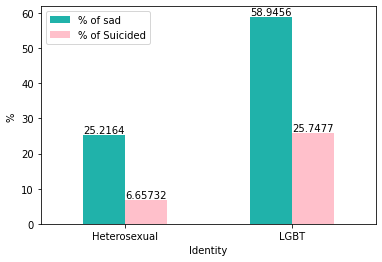

In [17]:
ax = Comparision1.plot.bar(rot=0, color=['lightseagreen','pink'])
plt.ylabel('% ')
plt.xlabel('Identity')
plt.legend(loc=0);
for container in ax.containers:
    ax.bar_label(container)

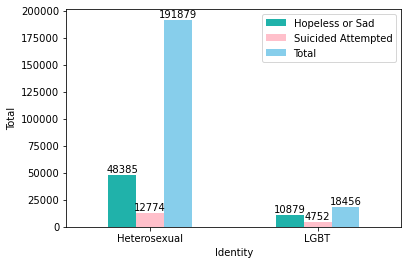

In [18]:
ax = Comparision2.plot.bar(rot=0, color=['lightseagreen','pink','skyblue'])
plt.ylabel('Total')
plt.xlabel('Identity')
plt.legend(loc=0);
for container in ax.containers:
    ax.bar_label(container)

<img src="https://cdn.dribbble.com/users/1769954/screenshots/3881945/media/c0fe4807ee4cacea279b5499f0438a99.png" style = "float:right; width:150px; height:100px;">

> **💓We can observe from the graph above that LGBT people have a significantly higher suicide rate and negative mood rate than straight people.💓**

 #### 1.2.1 Suicide frequency Ratio Comparison

In [19]:
dfall2 = df[(df.sexid2 !=3)][['sexid2','q25','q28']]
dfall2 = dfall2.dropna()# I cleaned it because there could be a lot of none values.
dfall2['sexid2'] = np.where(dfall2['sexid2'] == 1,'Heterosexual', 'LGBT')
dfall2.columns={'Identity','Hopeless or Sad', 'Suicided Attempts'}
dfall2

,Identity,Hopeless or Sad,Suicided Attempts
119065,Heterosexual,2.0,1.0
119066,Heterosexual,1.0,1.0
119067,Heterosexual,2.0,1.0
119068,Heterosexual,2.0,1.0
119070,Heterosexual,1.0,1.0
...,...,...,...
962918,Heterosexual,2.0,1.0
962919,Heterosexual,2.0,1.0
962921,Heterosexual,2.0,1.0
962923,Heterosexual,1.0,1.0


In [20]:
Comparision3 = dfall2.groupby(['Identity','Suicided Attempts']).count()
Comparision3.columns = ['Total']
Comparision3['%'] = 100 * Comparision3['Total'] / Comparision3.groupby('Identity')['Total'].transform('sum')
Comparision3.drop(columns = 'Total',inplace = True)
Comparision3

%
Identity     Suicided Attempts           
Heterosexual 1.0                93.342680
             2.0                 4.280302
             3.0                 1.592670
             4.0                 0.297062
             5.0                 0.487286
LGBT         1.0                74.252276
             2.0                12.472909
             3.0                 8.452536
             4.0                 1.966840
             5.0                 2.855440

In [21]:
Heterosexual = [93.342680,4.280302,1.592670,0.29706,0.487286]
LGBT = [74.252276,12.472909,8.452536,1.966840,2.855440]
index = ['0', '1', '2-3', '4-5', '>=6']
dfp = pd.DataFrame({'Heterosexual': Heterosexual,
                   'LGBT': LGBT}, index=index)
dfp

,Heterosexual,LGBT
0,93.342680,74.252276
1,4.280302,12.472909
2-3,1.592670,8.452536
4-5,0.297060,1.966840
>=6,0.487286,2.855440


Text(0, 0.5, 'Percentage')

<Figure size 360x216 with 0 Axes>

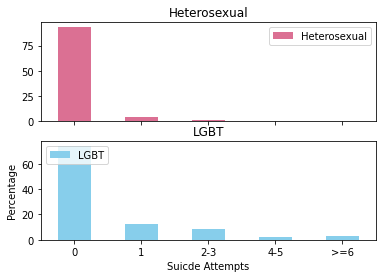

In [22]:
plt.figure(figsize=(5,3))
ax = dfp.plot.bar(rot=0, subplots=True,color=['palevioletred','skyblue'])
ax[1].legend(loc=2) 
plt.xlabel('Suicde Attempts')
plt.ylabel('Percentage')

<img src="https://cdn.dribbble.com/users/1769954/screenshots/3881945/media/c0fe4807ee4cacea279b5499f0438a99.png" style = "float:right; width:150px; height:100px;">

> **💓We can see from the graph above that the LGBT community has a far higher suicide attempt frequency than the heterosexual community, implying that they attempted suicide more frequently.**

**😭 <font color='palevioletred'>LGBT people attempt suicide at a higher rate and more frequently than heterosexual people.</font> 😭**

## 2.Variables that show higher ratio in LGBT compared with heterosexual.

In [23]:
m=pd.DataFrame(dfLGBT.mean())
n=pd.DataFrame(dfstraight.mean())

C:\Users\18552\AppData\Local\Temp/ipykernel_2516/1346850550.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  m=pd.DataFrame(dfLGBT.mean())
C:\Users\18552\AppData\Local\Temp/ipykernel_2516/1346850550.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  n=pd.DataFrame(dfstraight.mean())


In [24]:
M= abs(m-n)
M.columns={'Difference'}
M.loc[M.Difference >0.3]

,Difference
year,0.759506
survyear,0.379753
weight,0.601766
stratum,0.666891
record,60662.329863
stweight,0.737931
bmi,1.327924
bmipct,4.623759
q67,1.722400
q66,0.784161


<img src="https://cdn.dribbble.com/users/1769954/screenshots/3881945/media/c0fe4807ee4cacea279b5499f0438a99.png" style = "float:right; width:150px; height:100px;">

**⚠️Explanation⚠️**

>  To quickly distinguish the distinct variables from 150 variables, I just utilize basic difference computations between LGBT and Straight, which is not very strict. And I will do further reasearch about it. 
>
>  And after going over all of the variable definitions, I picked 'q17', 'q23', 'q22', 'q32', 'q46', 'q79', 'bmipct', 'q78', 'q88', 'q81', based on normal sense, data remaining after cleaning, high difference.

In [25]:
dfLGBT1=dfLGBT[['q17','q23','q22','q32','q46','q79','bmipct','q78','q88','q81']]
dfLGBT1 = dfLGBT1.dropna()
dfLGBT1.shape

(5473, 10)

In [26]:
dfstraight1=dfstraight[['q17','q23','q22','q32','q46','q79','bmipct','q78','q88','q81']]
dfstraight1=dfstraight1.dropna() 
dfstraight1.shape

(57947, 10)

<img src="https://www.whitesourcesoftware.com/wp-content/media/2021/06/Pride-Blog-01-1.png" style = "float:right; width:500px; height:350px;">

>-`q17`:Physical fighting
>
>-`q23`:Bullying at school
>
>-`q22`:Physical dating violence
>
>-`q32`:Current cigarette use
>
>-`q46`:Ever marijuana use
>
>-`q79`:Physical activity >= 5 days
>
>-`bmipct`:Student’s BMI percentile
>
>-`q78`:Breakfast eating
>
>-`q88`:Sleep
>
>-`q81`:Computer use

In [27]:
dfstraighttest=dfstraight1.drop(columns=['bmipct','q32'])

In [28]:
dfLGBTtest=dfLGBT1.drop(columns=['bmipct','q32'])

**⚠️Explanation⚠️**
> I removed two variables since the 'bmipct' range is too broad and the 'q23' range is too narrow, both of which have an impact on the visualization of others.

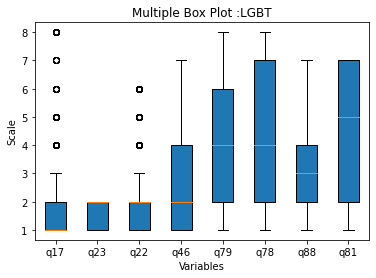

In [29]:
labels = ['q17','q23','q22','q46','q79','q78','q88','q81']
plt.boxplot(dfLGBTtest, vert=True, patch_artist=True, labels=labels) 
plt.ylabel('Scale')
plt.xlabel('Variables')
plt.title('Multiple Box Plot :LGBT')
plt.show()

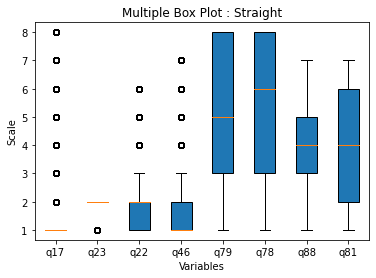

In [30]:
labels = ['q17','q23','q22','q46','q79','q78','q88','q81']
plt.boxplot(dfstraighttest, vert=True, patch_artist=True, labels=labels) 

plt.ylabel('Scale')
plt.xlabel('Variables')
plt.title('Multiple Box Plot : Straight')
plt.show()

<img src="https://cdn.dribbble.com/users/1769954/screenshots/3881945/media/c0fe4807ee4cacea279b5499f0438a99.png" style = "float:right; width:150px; height:100px;">

**❤️<font color='palevioletred'>From the box chart, we could find that LBGT has a lower scale and mean on `Q79`(Physical activity >= 5 days), `Q78`(Breakfast eating), but higher scale and mean on `Q17`(Physical fighting), `Q23`(Bullying at school), `Q46`(Ever marijuana use), `Q88`(Sleep),and `Q81`(Computer use).**

><font color='palevioletred'>It's a good idea to skip `Q22` because the two images are so similar.

In [31]:
a=dfLGBT1[['bmipct','q32']]
a.insert(2, "Identity", 'LGBT')
b=dfstraight1[['bmipct','q32']]
b.insert(2, "Identity", 'Heterosexual')
l=pd.concat([a, b])

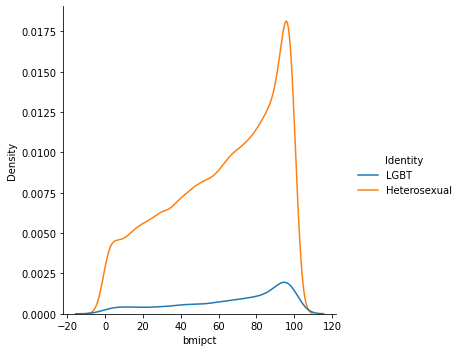

In [32]:
sns.displot(l,x='bmipct',hue='Identity',kind='kde')

In [33]:
u = l.groupby(['Identity','q32']).count()
u.columns = ['Total']
u['%'] = 100 * u['Total'] / Comparision.groupby('Identity')['Total'].transform('sum')
u = u.drop(columns = 'Total')
u

%
Identity     q32           
Heterosexual 1.0  27.687240
             2.0   0.916724
             3.0   0.378363
             4.0   0.268398
             5.0   0.275695
             6.0   0.191266
             7.0   0.482075
LGBT         1.0  24.051799
             2.0   1.804291
             3.0   0.910273
             4.0   0.601430
             5.0   0.606849
             6.0   0.406372
             7.0   1.273299

In [34]:
Heterosexual = [27.687240,0.916724,0.378363,0.268398,0.275695,0.191266,0.482075]
LGBT = [24.051799,1.8042919,0.910273,0.6014300,0.606849,0.406372,1.273299]
index = ['0', '1 or 2 days', '3 to 5 days', '6 to 9 days', '10 to 19 days','20 to 29 days','All 30 days']
k = pd.DataFrame({'Heterosexual': Heterosexual,
                   'LGBT': LGBT}, index=index)
k

,Heterosexual,LGBT
0,27.687240,24.051799
1 or 2 days,0.916724,1.804292
3 to 5 days,0.378363,0.910273
6 to 9 days,0.268398,0.601430
10 to 19 days,0.275695,0.606849
20 to 29 days,0.191266,0.406372
All 30 days,0.482075,1.273299


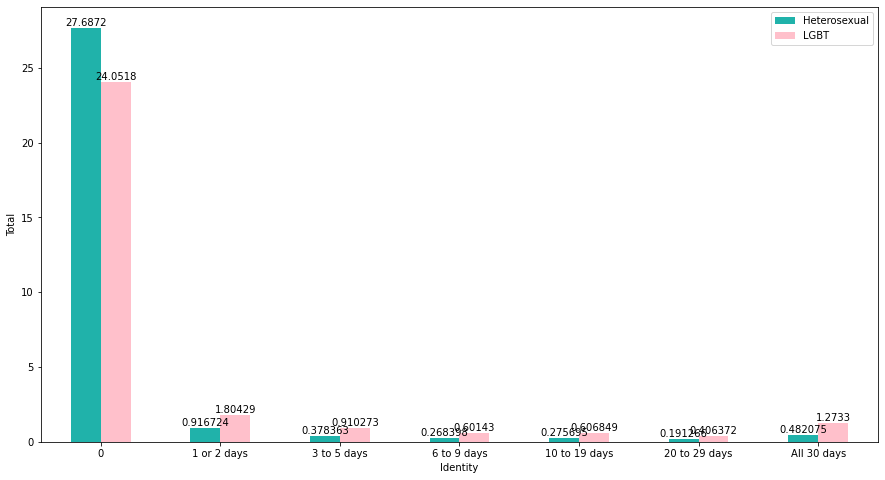

In [35]:
ax = k.plot.bar(rot=0, color=['lightseagreen','pink','skyblue'],figsize=(15,8))
plt.ylabel('Total')
plt.xlabel('Identity')
plt.legend(loc=0);
for container in ax.containers:
    ax.bar_label(container)

<img src="https://cdn.dribbble.com/users/1769954/screenshots/3881945/media/c0fe4807ee4cacea279b5499f0438a99.png" style = "float:right; width:150px; height:100px;">

**❤️<font color='palevioletred'>`Q32` LGBT has a higher smoking frequency than Straight.
Although the `bmipct` is not particularly clear, it still shows that Straight people have a higher bmi health score than LGBT people.**

## 3.Classification

**⚠️Explanation⚠️**
>-  I just chose several elements to credit for the fact that LGBT people attempt suicide at a higher rate than Straight people, but the relationship between the two is yet unknown.
>
>- I run regression to determine if there is a classification relationship between the factors I specified and the Suicide attempted numbers (which are 0 and 1)..

In [36]:
import matplotlib.pylab as plt
%matplotlib inline 

from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, recall_score, f1_score

In [37]:
dfLGBT2=dfLGBT[['q17','q23','q32','q46','q79','bmipct','q78','q88','q81','q28']]
dfLGBT2['q28'] = np.where(dfLGBT2['q28'] > 1, 1, 0)
dfLGBT2 = dfLGBT2.dropna()
dfLGBT2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5891 entries, 221624 to 962916
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   q17     5891 non-null   float64
 1   q23     5891 non-null   float64
 2   q32     5891 non-null   float64
 3   q46     5891 non-null   float64
 4   q79     5891 non-null   float64
 5   bmipct  5891 non-null   float64
 6   q78     5891 non-null   float64
 7   q88     5891 non-null   float64
 8   q81     5891 non-null   float64
 9   q28     5891 non-null   int32  
dtypes: float64(9), int32(1)
memory usage: 483.2 KB


In [38]:
dfLGBT2['q28'].value_counts()

0    4731
1    1160
Name: q28, dtype: int64

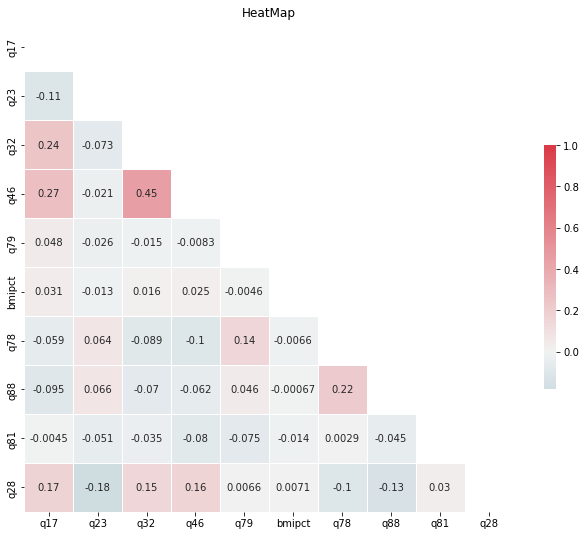

In [39]:
corrmat=dfLGBT2.corr()
mask = np.zeros_like(corrmat, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corrmat,mask=mask,cmap=cmap,vmax=1,center=0,square=True,annot=True,
            linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('HeatMap')
plt.savefig('correlation2.png')

<img src="https://cdn.dribbble.com/users/1769954/screenshots/3881945/media/c0fe4807ee4cacea279b5499f0438a99.png" style = "float:right; width:150px; height:100px;">

**❤️<font color='palevioletred'>From the heat map, I could see that there is no correlation over 0.7. `Q17`, `Q23`, `Q32`,`Q46`, `Q88` has a high correlation with `Q28`.**

### 3.1 KNN-Classification

#### 3.1.1 Model Split and Feature Selection

In [40]:
random_state =  np.random.RandomState(42)
X = dfLGBT2.iloc[:,0:9].values
Y = dfLGBT2.iloc[:,9].values
X_train, X_temp, Y_train, Y_temp  = train_test_split(X, Y, test_size=0.4, random_state=random_state)
X_val, X_test, Y_val, Y_test  = train_test_split(X, Y, test_size=0.5, random_state=random_state)
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)

(3534, 9) (3534,)
(2945, 9) (2945,)
(2946, 9) (2946,)


In [41]:
unique_elements, counts_elements = np.unique(Y_train, return_counts=True)
print(unique_elements)
print(counts_elements)

[0 1]
[2836  698]


In [42]:
unique_elements, counts_elements = np.unique(Y_val, return_counts=True)
print(unique_elements)
print(counts_elements)

[0 1]
[2370  575]


In [43]:
unique_elements, counts_elements = np.unique(Y_test, return_counts=True)
print(unique_elements)
print(counts_elements)

[0 1]
[2361  585]


In [44]:
from sklearn.feature_selection import SelectKBest, chi2

In [45]:
ch2 = SelectKBest(chi2, k=5) 
X_train = ch2.fit_transform(X_train, Y_train)
X_val = ch2.transform(X_val)
X_test = ch2.transform(X_test)

In [46]:
cols = ch2.get_support(indices=True)
dfLGBT2.iloc[:,cols].columns

Index(['q17', 'q32', 'q46', 'q78', 'q88'], dtype='object')

**❤️<font color='palevioletred'>`Q17`, `Q23`, `Q32`,`Q46`, `Q88`has a good feature.**`

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

#### 3.1.2 Tuning Hyperparameters

In [48]:
from sklearn.metrics import plot_roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

In [49]:
dfLGBT2_knn = pd.DataFrame(columns=['neighbors','weight', 'accuracy', 'F1', 'ROC_area'])

for neighbor_count in range (1,6):
    for weight_metric in ['uniform', 'distance']:    
        knn_ht = KNeighborsClassifier(n_neighbors=neighbor_count, weights=weight_metric) # initialize a KNN classifier
        knn_ht.fit(X_train, Y_train)

        Y_pred_prob_ht = knn_ht.predict_proba(X_val)[:, 1]
       
        accuracy = knn_ht.score(X_val,Y_val)
        f1 = f1_score(Y_val,knn_ht.predict(X_val),average='weighted')
        roc = roc_auc_score(Y_val, Y_pred_prob_ht)       
        
        dict_values = {'neighbors': neighbor_count, 'weight': weight_metric,'accuracy':accuracy,'F1' : f1, 'ROC_area':roc}
        row_to_add = pd.Series(dict_values)
        
        dfLGBT2_knn = dfLGBT2_knn.append(row_to_add, ignore_index=True)

dfLGBT2_knn.set_index(['neighbors','weight'], inplace=True)
dfLGBT2_knn

accuracy        F1  ROC_area
neighbors weight                                
1         uniform   0.804754  0.800675  0.669917
          distance  0.804754  0.800675  0.669917
2         uniform   0.817317  0.769990  0.690592
          distance  0.840407  0.819389  0.721216
3         uniform   0.807470  0.784957  0.684935
          distance  0.835993  0.818806  0.736786
4         uniform   0.808829  0.756288  0.679122
          distance  0.839728  0.817545  0.746869
5         uniform   0.797284  0.763552  0.683538
          distance  0.836333  0.816475  0.760013

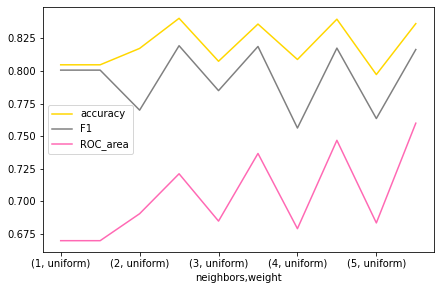

In [50]:
dfLGBT2_knn.plot(figsize = (7,4.5),color=['gold','grey','hotpink']);


**❤️<font color='palevioletred'> It is easy to choose(5, distance) because it has relatively higher accuracy, F1, ROC_area.**

In [51]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance') 
knn.fit(X_train, Y_train) 

KNeighborsClassifier(weights='distance')

#### 3.1.3 Report----Confusion Matrix

In [52]:
Y_train_predicted = knn.predict(X_train) 

In [53]:
print("Training Classification accuracy:", knn.score(X_train, Y_train))
print("\n")
print ("Training Confusion matrix: \n" + str(confusion_matrix(Y_train, Y_train_predicted)))
print("\n")
print("Training Classification Report:\n",classification_report(Y_train, Y_train_predicted))

Training Classification accuracy: 0.8817204301075269


Training Confusion matrix: 
[[2790   46]
 [ 372  326]]


Training Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      2836
           1       0.88      0.47      0.61       698

    accuracy                           0.88      3534
   macro avg       0.88      0.73      0.77      3534
weighted avg       0.88      0.88      0.87      3534



In [54]:
Y_test_predicted = knn.predict(X_test)
conf_matrix_knn = confusion_matrix(Y_test, Y_test_predicted)
print('************K-NEAREST NEIGHBOR************')
print("Test Classification accuracy:", knn.score(X_test,Y_test))
print("\n")
print ("Test Confusion matrix: \n" + str(conf_matrix_knn))
print("\n")
print("Test Classification Report:\n",classification_report(Y_test, Y_test_predicted))

************K-NEAREST NEIGHBOR************
Test Classification accuracy: 0.8346911065852003


Test Confusion matrix: 
[[2257  104]
 [ 383  202]]


Test Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      2361
           1       0.66      0.35      0.45       585

    accuracy                           0.83      2946
   macro avg       0.76      0.65      0.68      2946
weighted avg       0.82      0.83      0.81      2946



[[2257  104]
 [ 383  202]]


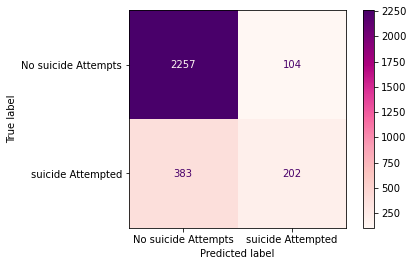

In [55]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(knn, X_test, Y_test,
                                 display_labels=['No suicide Attempts','suicide Attempted'],
                                 cmap=plt.cm.RdPu,
                                 normalize=None)
print(disp.confusion_matrix)

#### 3.1.4 Report -----ROC Curve

Area under the ROC: 0.7685932731676061


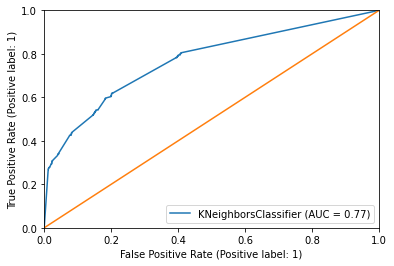

In [56]:
viz = plot_roc_curve(knn, X_test, Y_test)
print('Area under the ROC:', viz.roc_auc)   
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0])
plt.show();

**❤️<font color='palevioletred'> The ROC is 0.77 and I think it is accecptable.**

### 3.2  Desicion Tree

**⚠️Explanation⚠️**
> I tried to do decision tree because I want to get more straight visualization about classfication.

In [57]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
pd.set_option('display.notebook_repr_html', True)
from sklearn import tree
import graphviz

In [58]:
def print_tree(d_tree, f_names, c_names=None):
    dot_data = tree.export_graphviz(d_tree, out_file=None, feature_names=f_names, class_names=c_names, 
                                    filled=True, rounded=True, special_characters=True)  
    graph = graphviz.Source(dot_data)  
    return graph 

In [59]:
from sklearn import tree
type(dfLGBT2)

pandas.core.frame.DataFrame

In [60]:
dfLGBT2

,q17,q23,q32,q46,q79,bmipct,q78,q88,q81,q28
221624,1.0,2.0,1.0,1.0,6.0,93.495283,8.0,3.0,4.0,0
221690,1.0,2.0,1.0,1.0,1.0,78.317474,8.0,4.0,6.0,0
221707,6.0,2.0,6.0,6.0,8.0,19.436253,8.0,2.0,1.0,0
221737,1.0,2.0,1.0,1.0,8.0,94.421474,1.0,6.0,3.0,1
221800,1.0,2.0,1.0,1.0,2.0,81.394716,7.0,3.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...
962842,1.0,2.0,7.0,2.0,3.0,79.456875,2.0,2.0,2.0,0
962868,1.0,2.0,1.0,5.0,1.0,84.253780,5.0,2.0,1.0,1
962888,1.0,2.0,1.0,4.0,3.0,96.318389,8.0,6.0,1.0,0
962898,1.0,2.0,1.0,1.0,1.0,36.048922,3.0,1.0,1.0,0


In [61]:
random_state =  np.random.RandomState(42)
X1 = dfLGBT2.drop('q28', axis=1) 
y1 = dfLGBT2.q28
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X1, y1, test_size=0.15, random_state=23)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=23)

In [62]:
print('X_train Shape:',X_train.shape)
print('X_test Shape:',X_test.shape)
print('X_val Shape:',X_val.shape)
print('')
print('Y_train Shape:',y_train.shape)
print('Y_test Shape:',y_test.shape)
print('Y_val Shape:',y_val.shape)

X_train Shape: (4005, 9)
X_test Shape: (884, 9)
X_val Shape: (1002, 9)

Y_train Shape: (4005,)
Y_test Shape: (884,)
Y_val Shape: (1002,)


In [63]:
clftree = DecisionTreeClassifier(max_leaf_nodes=6, max_features=5, random_state=23)
clftree.fit(X_train,y_train)

DecisionTreeClassifier(max_features=5, max_leaf_nodes=6, random_state=23)

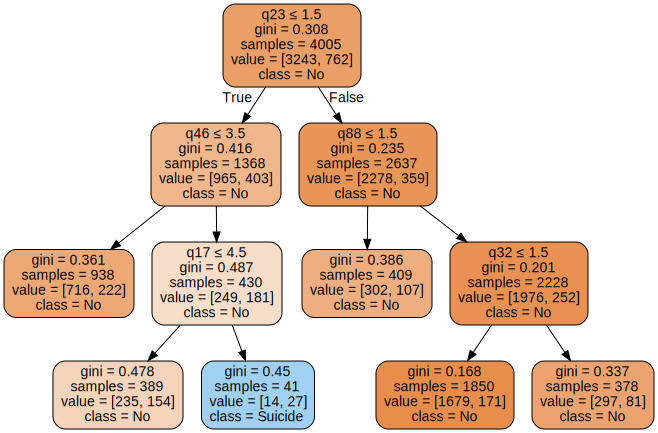

In [64]:
graphClf = print_tree(d_tree=clftree, f_names=X1.columns, c_names=['No', 'Suicide'])
graphClf

In [65]:
print("Validation Set Classification Accuracy:", clftree.score(X_val,y_val))
print("Confusion Matrix:")
cm = pd.DataFrame(confusion_matrix(y_val, clftree.predict(X_val)), index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
display(cm)
print("Classification Report:")
print(classification_report(y_val, clftree.predict(X_val)))

Validation Set Classification Accuracy: 0.7954091816367266
Confusion Matrix:


Predicted,No,Yes
Actual,,
No,792,4
Yes,201,5


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89       796
           1       0.56      0.02      0.05       206

    accuracy                           0.80      1002
   macro avg       0.68      0.51      0.47      1002
weighted avg       0.75      0.80      0.71      1002



In [66]:
clftree_2 = DecisionTreeClassifier(max_leaf_nodes=6, max_features=9, random_state=23)
clftree_2.fit(X_train,y_train)

DecisionTreeClassifier(max_features=9, max_leaf_nodes=6, random_state=23)

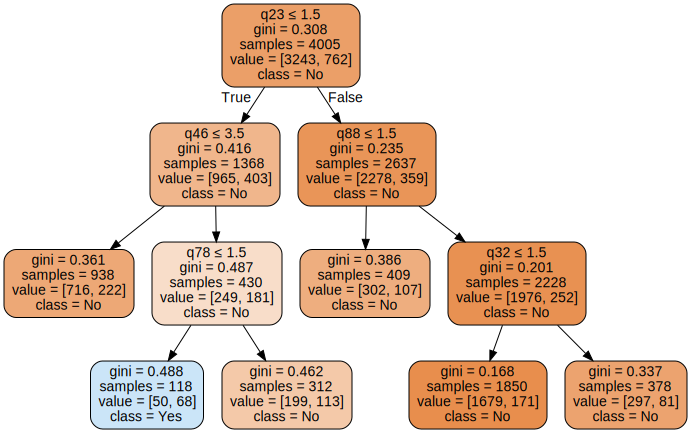

In [67]:
graphClf_2 = print_tree(d_tree=clftree_2, f_names=X1.columns, c_names=['No', 'Yes'])
graphClf_2

In [68]:
print("Validation Set Classification Accuracy:", clftree_2.score(X_val,y_val))

# confusion matrix
print("Confusion Matrix:")
cm_2 = pd.DataFrame(confusion_matrix(y_val, clftree_2.predict(X_val)), index=['No', 'Yes'], columns=['No', 'Yes'])
cm_2.index.name = 'Actual'
cm_2.columns.name = 'Predicted'
display(cm_2)

# Classification Report
print("Classification Report:")
print(classification_report(y_val, clftree_2.predict(X_val)))

Validation Set Classification Accuracy: 0.7874251497005988
Confusion Matrix:


Predicted,No,Yes
Actual,,
No,780,16
Yes,197,9


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       796
           1       0.36      0.04      0.08       206

    accuracy                           0.79      1002
   macro avg       0.58      0.51      0.48      1002
weighted avg       0.71      0.79      0.71      1002



**❤️<font color='palevioletred'> Compared two models, I perfer the first one to do my test model because it has lower gini number.**

In [69]:

print("Test Set Classification Accuracy:", clftree.score(X_test,y_test))

print("Confusion Matrix:")
cm_final = pd.DataFrame(confusion_matrix(y_test, clftree.predict(X_test)), index=['No', 'Yes'], columns=['No', 'Yes'])
cm_final.index.name = 'Actual'
cm_final.columns.name = 'Predicted'
display(cm_final)

print("Classification Report:")
print(classification_report(y_test, clftree.predict(X_test)))

Test Set Classification Accuracy: 0.7918552036199095
Confusion Matrix:


Predicted,No,Yes
Actual,,
No,691,1
Yes,183,9


Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       692
           1       0.90      0.05      0.09       192

    accuracy                           0.79       884
   macro avg       0.85      0.52      0.49       884
weighted avg       0.81      0.79      0.71       884



## 4.Regression

**⚠️Explanation⚠️**
> I utilize suicide attempts to run regression to see whether there is a relationship between the factors I chose and the Suicide Frequency.

In [70]:
dfLGBT3=dfLGBT[['q17','q23','q32','q46','q79','bmipct','q78','q88','q81','q28']]
dfLGBT3 = dfLGBT3.dropna()
dfLGBT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22237 entries, 119074 to 962916
Columns: 150 entries, sitecode to qtransgender
dtypes: float64(141), int64(6), object(3)
memory usage: 25.6+ MB


### 4.1 Heat Map

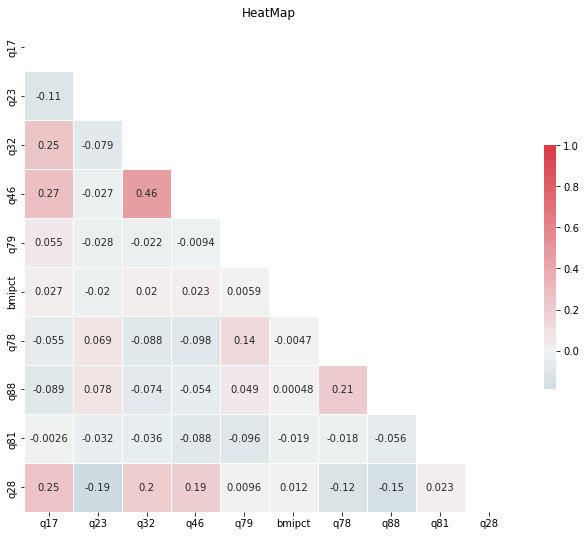

In [71]:
corrmat=dfLGBT3.corr()
mask = np.zeros_like(corrmat, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corrmat,mask=mask,cmap=cmap,vmax=1,center=0,square=True,annot=True,
            linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('HeatMap')
plt.savefig('correlation2.png')

<img src="https://cdn.dribbble.com/users/1769954/screenshots/3881945/media/c0fe4807ee4cacea279b5499f0438a99.png" style = "float:right; width:150px; height:100px;">

**❤️<font color='palevioletred'>From the heat map, I could see that there is no correlation over 0.7. `Q17`, `Q23`, `Q32`,`Q46`, `Q88` has a high correlation with `Q28`.**

### 4.2 Mutiple Regression

In [72]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [73]:
import sklearn.linear_model as sklm
m_reg=sklm.LinearRegression() 
X_m = dfLGBT3[['q17','q23','q32','q46','q88']]
Y_m = dfLGBT3.q28
X_train_m, X_test_m, Y_train_m, Y_test_m = train_test_split(X_m, Y_m, test_size=0.8, random_state=42)
m_reg.fit(X_train_m, Y_train_m)

LinearRegression()

In [74]:
print('Intercept:', m_reg.intercept_)
coeff_df = pd.DataFrame(m_reg.coef_, X_m.columns, columns=['Coefficient'])
coeff_df

Intercept: 1.7379004302651198


,Coefficient
q17,0.111281
q23,-0.334104
q32,0.058547
q46,0.032049
q88,-0.045856


In [75]:
Y_predict_m = m_reg.predict(X_test_m)

# compare actual values with the predicted
df_m = pd.DataFrame({'Actual': Y_test_m, 'Predicted': Y_predict_m})
df_m

,Actual,Predicted
910615,1.0,1.216342
379945,1.0,1.042288
380588,1.0,1.330537
916935,1.0,1.211906
408501,1.0,1.088144
...,...,...
911297,1.0,0.996432
943833,1.0,1.179857
947206,1.0,1.731638
326522,1.0,1.151127


In [76]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_m, Y_predict_m))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(Y_test_m, Y_predict_m))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_m, Y_predict_m)))
print("R-Squared:", metrics.r2_score(Y_test_m, Y_predict_m))

Mean Absolute Error: 0.5300251381143998
Mean Squared Error (MSE): 0.5969135483419071
Root Mean Squared Error: 0.7726018045163415
R-Squared: 0.12270962654531015


<img src="https://cdn.dribbble.com/users/1769954/screenshots/3881945/media/c0fe4807ee4cacea279b5499f0438a99.png" style = "float:right; width:150px; height:100px;">

**❤️<font color='palevioletred'> I can see that r suquare is quite low; it's possible that the factors I chose have a slight effect on suicide frequency, but this isn't well explained.**

# 5. Summary

<img src="https://media.istockphoto.com/illustrations/two-young-men-holding-rainbow-flags-lgbt-parade-concept-clipart-illustration-id1205753703?k=20&m=1205753703&s=612x612&w=0&h=6t7ezY1-_5XbsIPUbgvZr6fxaV-1EJeEtRfIovThG4A=" style = "float:left; width:250px; height:200px;">


💑**<font color='grey'>Q17, Q23, Q32, Q46, Q88 have a high association with Q28 in terms of suicide attempt percentage and suicide attempt frequency. `Physical fighting`, `bullying at school`, `current cigarette usage`, `previous marijuana use`, and `sleep` are all factors.**

**<font color='palevioletred'>That is something that should be taken into consideration.**💑

### 5.1 Physical Fighting

In [77]:
i=df[['q17','sex']]
i=i.dropna()
i1 = i.loc[i['sex'] == 1]# sex1 is female
i2 = i.loc[i['sex'] == 2]# sex2 is male

In [78]:
i1.q17.mean()

1.4424357214709818

In [79]:
i2.q17.mean()

1.8562963645578952

In [80]:
male = [1.85]
female = [1.44]
index = ['mean']
r = pd.DataFrame({'female': female,
                   'male': male}, index=index)
r

,female,male
mean,1.44,1.85


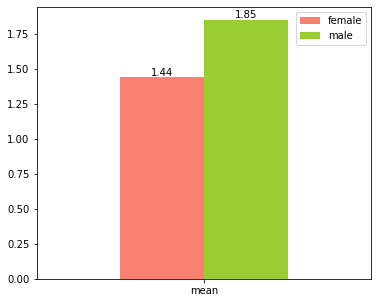

In [81]:
ax = r.plot.bar(rot = 0,color=['salmon','yellowgreen'],figsize=(6,5))
plt.legend(loc=0);
for container in ax.containers:
    ax.bar_label(container)

💑**<font color='palevioletred'>This to see that male has a higher Pysical Fighting than female.**

In [82]:
dfstraight.sex.mean()

1.5097614177361838

In [83]:
dfLGBT.sex.mean()

1.3011068754879898

In [84]:
dfstraight.q17.mean()

1.4362539647980366

In [85]:
dfLGBT.q17.mean()

1.7676359039190899

In [86]:
Heterosexual = [1.5,1.44]
LGBT = [1.3,1.77]
index = ['sex','q17']
p = pd.DataFrame({'Heterosexual': Heterosexual,
                   'LGBT': LGBT}, index=index)
p

,Heterosexual,LGBT
sex,1.50,1.30
q17,1.44,1.77


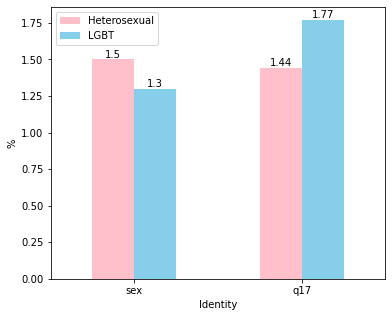

In [87]:
ax = p.plot.bar(rot = 0,color=['pink','skyblue'],figsize=(6,5))
plt.ylabel('%')
plt.xlabel('Identity')
plt.legend(loc=0);
for container in ax.containers:
    ax.bar_label(container)

In [88]:
dfe = dfLGBT[['q17','q23']]
dfe = dfe.dropna()
dfe['q17'] = np.where(dfe['q17'] > 1, 1, 0)
dfe['q23'] = np.where(dfe['q23'] > 1, 1, 0)
dfe = dfe.loc[dfe['q17'] == 1]
sum(dfe['q23'] == 1)/sum(dfe['q17'])

0.5423666235923943

In [89]:
dfg = dfe.loc[dfe['q23'] == 2]
sum(dfm['qbullygay'] == 1)/sum(dfm['qbullygay'])

NameError: name 'dfm' is not defined

<img src="https://cdn.dribbble.com/users/1769954/screenshots/3881945/media/c0fe4807ee4cacea279b5499f0438a99.png" style = "float:right; width:200px; height:150px;">

**❤️<font color='palevioletred'>To be hoest, I was think of the high pyscial fighting may be cause be sex biased because boys tend to involved in a pysical fighting than girls. However, this case is having more female in LGBT group but tend to involve pysical fighting more frequently.**

**<font color='metalblue'>There could be some reason that they felt discriminted and fight it but still need further study. Other document will support it, and I will explain on Powerpoint.**

### 5.2  Bullying at School

**⚠️Explanation⚠️**
> There is one variable which is `qnbullygay`, and I did not use it because it has over 20k data missing which really affects my other variables usage and classfication analysis. However, I intend to take it alone to analyze.

In [ ]:
dfm = dfLGBT[['q23','qbullygay']]
dfm = dfm.dropna()

In [ ]:
dfg = dfm.loc[dfm['q23'] == 2]
sum(dfm['qbullygay'] == 1)/sum(dfm['qbullygay'])

**❤️<font color='palevioletred'>According to research, 26 percent of LGBT students who report being bullied at school are bullied because of their sexual orientation, which might be avoided.**

### 5.3 Current Cigarette Usage

**⚠️Explanation⚠️**
> There is one variable which is `qcigschool`, and it is variable about smoking at school times over 30 days.

In [ ]:
dfc = dfLGBT[['q32','qcigschool']]
dfc = dfc.dropna()
dfc = dfc.loc[dfc['q32'] > 1]# just to select q32>1 which is LGBT has cigratte over last month.
dfd = dfc.loc[dfc['qcigschool'] > 1]# just to select LGBT who has cigratte at school over last month in the cigarte before case
dfd.qcigschool.count()/dfc.q32.count()

**❤️<font color='palevioletred'>According to surveys, 41% of LGBT students who had smoked a cigarette earlier also smoked in school.**
    
**❤️<font color='palevioletred'> Similarly, we cannot argue that their high suicide attempts are due to smoking, and that their high smoking may be caused by LGBT discrimination.**
   
**🥰<font color='palevioletred'> At least, students that smoke frequently at school should be given special attention by their teachers.**

### 5.4 Previous Marijuana

<img src="https://i.pinimg.com/originals/37/ed/c6/37edc62f62e81166e47ffa9ef7223016.png" style = "float:right; width:250px; height:250px;">

**⚠️Explanation⚠️**

> High previsou Marijuana may be caused by bad mood. I use`qmarijuanaschool`which is the marijuana use in 30 days and compare with bad mood in `all sexual identity` and concludes that bad mood has a good relationship with marijuana use. 
>
>Before, I know that LGBT tend to have bad mood, and maybe that is their reason of high marijuana previous use.

In [ ]:
dfz = dfLGBT[['q46']]
dfz['q46'] = np.where(dfz['q46'] > 1, 1, 0)
dfz.q46.value_counts().plot.pie(labels=['previous not', 'use'], colors=['palevioletred', 'steelblue'],
                                autopct='%.2f', fontsize=12, figsize=(5, 5));
plt.title('Previous Marijuana')
plt.axis('off');       

In [ ]:
dfo = df[['q25','qmarijuanaschool']]
dfo = dfo.dropna()
dfo['qmarijuanaschool'] = np.where(dfo['qmarijuanaschool'] > 1, 1, 0)
dfo = dfo.loc[dfo['q25']==1]
dfo.qmarijuanaschool.value_counts().plot.pie(labels=['not use', 'use'], colors=['orange', 'green'],
                 autopct='%.2f', fontsize=12, figsize=(5, 5));
plt.title('Bad mood try')
plt.axis('off');

In [ ]:
df5 = df[['q25','qmarijuanaschool']]
df5 = df5.dropna()
df5['qmarijuanaschool'] = np.where(df5['qmarijuanaschool'] > 1, 1, 0)
df5 = df5.loc[df5['q25']==2]
df5.qmarijuanaschool.value_counts().plot.pie(labels=['not use', 'use'], colors=['orange', 'green'],
                 autopct='%.2f', fontsize=12, figsize=(5, 5));
plt.title('Not Bad mood try')
plt.axis('off');

In [ ]:
dfv = df[['q25','qmarijuanaschool']]
dfv = dfv.dropna()
dfv['q25'] = np.where(dfv['q25'] == 1, 'sad', 'no')
dfv['qmarijuanaschool'] = np.where(dfv['qmarijuanaschool'] > 1, 'previous use', 'no use')
dfv.groupby(['q25','qmarijuanaschool']).qmarijuanaschool.count()

   
**🥰<font color='palevioletred'> The majority of LGBT people come into contact with marijuana via a joint, bong, pipe, or blunt. And they more likely to try marijuana. Since people with bad mood tend to try marijuana. May be it is the reason they try marijuana. Controlling youth marijuana problem is important since it can lead to addiction, which is harmful to their mental health.**

### 5.5 Sleep

In [ ]:
dfb = dfLGBT[['q88']]
dfb = dfb.dropna()
dfb['q88'] = np.where(dfb['q88'] > 4, 1, 0)# It is over 4 is 8hour sleep
dfb.q88.value_counts().plot.pie(labels=['not well', 'well'], colors=['pink', 'skyblue'],
                 autopct='%.2f', fontsize=12, figsize=(5, 5));
plt.title('Sleep over 8 Hours-LGBT')
plt.axis('off');

In [ ]:
dfh = dfstraight[['q88']]
dfh = dfh.dropna()
dfh['q88'] = np.where(dfh['q88'] > 4, 1, 0)
dfh.q88.value_counts().plot.pie(labels=['not well', ' well'], colors=['pink', 'lightblue'],
                 autopct='%.2f', fontsize=12, figsize=(5, 5));
plt.title('Sleep over 8 Hours-Straight')
plt.axis('off');

`https://www.clinicalkey.com/#!/content/playContent/1-s2.0-S2352721819300270?scrollTo=%23hl0000576`.

**🤕<font color='palevioletred'> Other document and data shows the LGBT has fewer sleep time than normal people🤕**


### 😺<font color='green'>We should listen to LGBT voices and give them greater attention to their sleeping habits, bullying issues, marijuana use, and smoking habits. To help them, there would be more mental health doctors.😺

<img src="https://images.squarespace-cdn.com/content/v1/5bf9e8ac5ffd203cac13edbc/1590971672216-JUUMW7XB3GLX78LWJYWU/IMG_3396.jpeg" style = "float:center; width:1000px; height:400px;">